In [23]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [24]:
# read data
df = pd.read_csv('../data/timelines.csv')

In [25]:
df.head()

,tournament_id,match_id,event_type,period,result,team,seconds_from_period_start,start_time,end_time,start_position_x,start_position_y,end_position_x,end_position_y,speed,home_team,away_team,home_team_int,away_team_int,age,year,distance,duration,int_level
0,57,1257,KickOff,1.0,NaN,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FC Espoo T2010,EPS T2010,0,0,F12,2022,NaN,NaN,0
1,57,1257,KickOff,1.0,NaN,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FC Espoo T2010,EPS T2010,0,0,F12,2022,NaN,NaN,0
2,57,1257,KickOff,1.0,NaN,Home,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FC Espoo T2010,EPS T2010,0,0,F12,2022,NaN,NaN,0
3,57,1257,ThrowIn,1.0,NaN,Away,91.0,NaN,NaN,30.93,18.94,30.93,18.94,NaN,FC Espoo T2010,EPS T2010,0,0,F12,2022,NaN,NaN,0
4,57,1257,ThrowIn,1.0,NaN,Away,397.0,NaN,NaN,-31.01,20.77,-31.63,18.99,NaN,FC Espoo T2010,EPS T2010,0,0,F12,2022,NaN,NaN,0


In [26]:
conditions = [
    (df["period"] == 1) & (df["seconds_from_period_start"] < 5),
    (df["period"] == 1) & (df["seconds_from_period_start"] > 1150),
    (df["period"] == 2) & (df["seconds_from_period_start"] < 5),
    (df["period"] == 2) & (df["seconds_from_period_start"] > 1150),
]

# Find IDs that satisfy each condition
satisfied_ids = [set(df.loc[cond, "match_id"]) for cond in conditions]

# Find IDs that satisfy ALL conditions across multiple rows
valid_ids = set.intersection(*satisfied_ids)

print(valid_ids)

{2305, 2195, 1324}


In [27]:
# pd.options.display.max_rows = 999
# pd.options.display.max_columns = 999
# df[(df['match_id'] == 2305)]

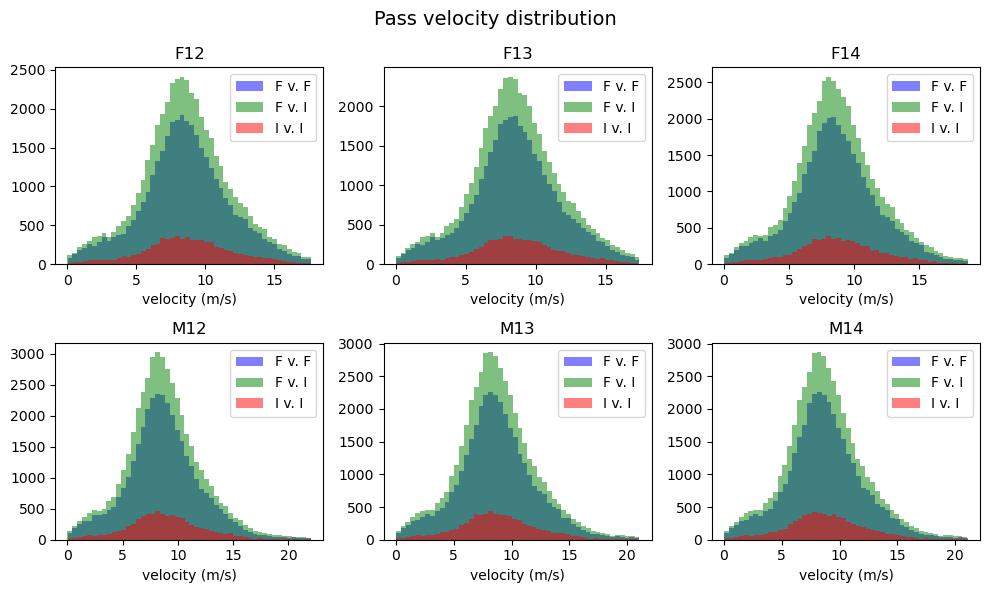

In [28]:
# plot histograms of pass speeds per age group
fig, axes = plt.subplots(2,3, figsize=(10,6))

colors = ['blue', 'green', 'red']

axes = axes.flatten()

# take only passes
df_passes = df[df['event_type'] == 'Pass']

df_grouped = df_passes.groupby('age')

for i, (group_name, df_group) in enumerate(df_grouped):
    percentile_999 = df_group['speed'].quantile(0.999)
    filtered_df = df[df['speed'] <= percentile_999]

    # Group by int_level within each age group
    int_levels = filtered_df['int_level'].unique()  # Get unique intensity levels

    for j, level in enumerate(int_levels):
        subset = filtered_df[filtered_df['int_level'] == level]
        axes[i].hist(subset['speed'], bins=50, alpha=0.5, color=colors[j % len(colors)], label=f'{['F v. F', 'F v. I', 'I v. I'][level]}')

    axes[i].set_title(group_name)
    axes[i].legend()  # Add legend to differentiate int_level categories
    axes[i].set_xlabel('velocity (m/s)')

fig.suptitle('Pass velocity distribution', fontsize=14)
plt.tight_layout()

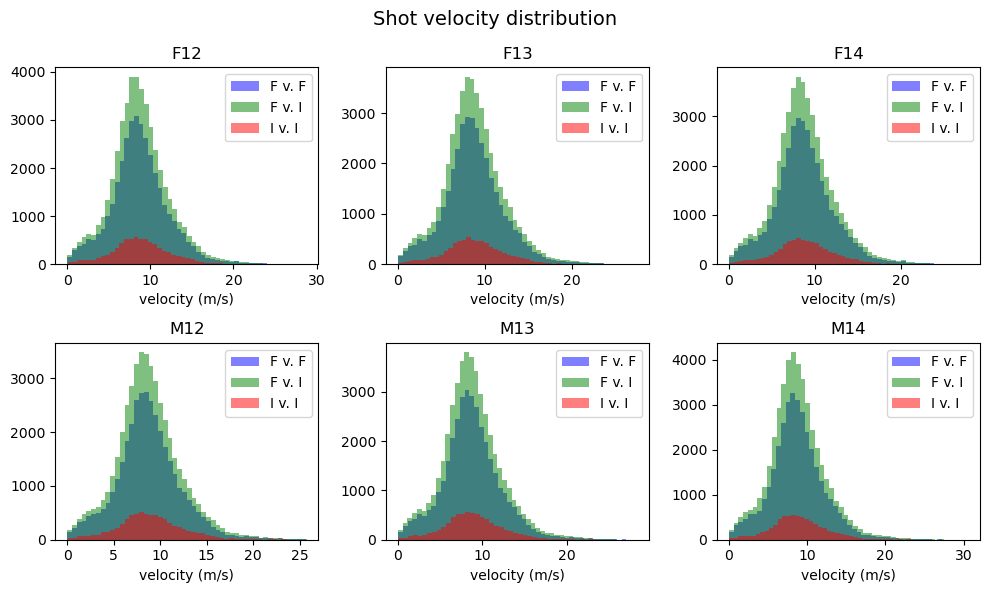

In [29]:
# plot histograms of shot speeds per age group
fig, axes = plt.subplots(2,3, figsize=(10,6))

colors = ['blue', 'green', 'red']

axes = axes.flatten()

# take only passes
df_shots = df[df['event_type'] == 'Shot']

df_grouped = df_shots.groupby('age')

for i, (group_name, df_group) in enumerate(df_grouped):
    percentile_999 = df_group['speed'].quantile(0.999)
    filtered_df = df[df['speed'] <= percentile_999]

    # Group by int_level within each age group
    int_levels = filtered_df['int_level'].unique()  # Get unique intensity levels

    for j, level in enumerate(int_levels):
        subset = filtered_df[filtered_df['int_level'] == level]
        axes[i].hist(subset['speed'], bins=50, alpha=0.5, color=colors[j % len(colors)], label=f'{['F v. F', 'F v. I', 'I v. I'][level]}')

    axes[i].set_title(group_name)
    axes[i].legend()  # Add legend to differentiate int_level categories
    axes[i].set_xlabel('velocity (m/s)')

fig.suptitle('Shot velocity distribution', fontsize=14)
plt.tight_layout()